Notebook 3, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2023-08-30, A. Mühlemann, University of Bern.

*This notebook is based on the notebook by S. Haug and G. Conti from 2020*

# Parameter estimation / regression

**Average expected study time :** 3x45 min (depending on your background)

**Learning outcomes :**

- Know what is meant by parameter estimation and regression
- Calculation of confidence intervals via Python
- Perform linear regression with Python by example
- Perform non-linear regression with Python by example
- Know what non-parametric regression is
- Perform linear regression with Python scikit-learn by example
...

**Main python modules used**
- the Scipy.stat module https://docs.scipy.org/doc/scipy/reference/stats.html
- the Scikit-learn module

If you run this notebook on google colab, you will (probably) have no problems with importing the modules.

**Link to weighted descriptive statistical methods in python**:
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

# 3. Inferential Statistics I
In this notebook we apply the methods presented in the course on the iris data set.

Import the Python libraries we need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

Import the iris data set.

In [2]:
url = 'C:/Users/tim94/OneDrive/Dokumente/Universität Bern/Data Acquisition and Management/data/Iris.csv'
df = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])


## 3.1 Model parameter estimation
Let us start with model parameter estimation. To this end, we go back to the outlook from the first notebook. There, we calculated the kurtosis and skewness for the different characteristics and species. We observed that the characteristic *slength* from of the species *iris virginica* has a kurtosis and skewness close to zero. We therefore concluded that a Gaussian model would probably be suitable. (We will see how to further justify that tomorrow).
Let us estimate the mean and standard deviation of the model.

In [5]:
# Estimation of mean and standard deviation
df_virginica=df[df['species']=='Iris-virginica']
from scipy.stats import norm
mean  = df_virginica['slength'].mean()
sd = df_virginica['slength'].std()
print(mean,sd)

6.587999999999998 0.635879593274432


So we get a mean of about 6.59 and a standard deviation of 0.64. Now let us see how the histogram of *slength* of *iris virginica* looks compared to our estimated model.

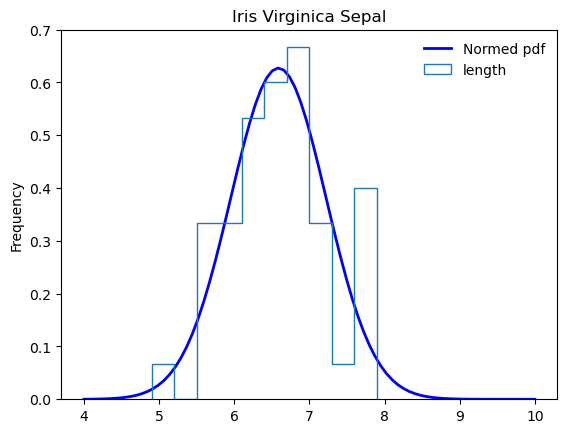

In [14]:
# Create figure and axis
fig, ax = plt.subplots(1,1)
x = np.linspace(4,10,80)
ax.plot(x, norm.pdf(x,mean,sd),'b-', lw=2, label='Normed pdf')
df_virginica['slength'].plot(kind="hist",fill=False,histtype='step',title='Iris Virginica Sepal', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.show()
# help(df.plot)

Looks not too bad, the right tail of the histogramm is a bit heavier than we would expect from a normal distribution. Let us check tomorrow whether a normal model is indeed justified - especially since the sample size is rather small.

## 3.2 Confidence intervall
At the moment we have no clue on how certain we are about point estimates for the mean and standard deviation we calculated above. Hence, it makes sense to additionally look at the confidence intervals.

In [63]:
#95%-confidence interval for the mean
# a,b=stats.t.interval(confidence=0.95, degrees of freedom, location (where is the mean?), scale=standart deviation!)
a,b=stats.t.interval(confidence=0.95, df=len(df_virginica['slength'])-1, loc=np.mean(df_virginica['slength']), scale=np.std(df_virginica['slength']))

# print(np.std(df_virginica['slength']))
# print(stats.sem((df_virginica['slength'])))

# help(stats.t.interval)
print(a,b)


5.322995135484387 7.85300486451561


If we already know that our data is normally distributed, we could also use the following code:

In [43]:
#95%-confidence interval for the when data is normally distributed
stats.norm.interval(confidence=0.95, loc=np.mean(df_virginica['slength']), scale=np.std(df_virginica['slength']))

(6.411746407971008, 6.764253592028989)

We can see that the confidence interval based on the t-distribution is a bit more conservative. But for this example the difference between the two is really small.

Unfortunately, there is no Python library that computes the confidence interval of standard deviation, so we have to do it "by hand".

In [64]:
# CI for standart deviation of population. how accurate is the std from our sample?

# confidence intervall for the standard deviation of normally distributed data
alpha = 0.05  # significance level = 5%
n = len(df_virginica['slength'])  # sample sizes
s2 = np.var(df_virginica['slength'], ddof=1)   # sample variance
degf = n - 1                 # degrees of freedom

upper = np.sqrt((n - 1) * s2 / stats.chi2.ppf(alpha / 2, degf))
lower = np.sqrt((n - 1) * s2 / stats.chi2.ppf(1 - alpha / 2, degf))
(lower, upper)
help(stats.chi2.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.chi2_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



Try to calculate the confidence intervals for the other 2 species.

You can find more on confidence intervals under https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers#chi_square - I found this Link quite helpful :)

## 3.1 About linear Regression

Simple linear regression means fitting a straight line to data a set of points $(x,y)$. You may consider this as the simplest case of Machine Learning (see Module 3). A line is described as

$$y = ax + b$$

Thus, two parameters $a$ (slope) and $b$ (intersection with y axis) are fitted.

There are different fitting methods, mostly least squares or maximum likelihood are used.


## Linear regression in Python

In notebook 1 we observed that there seems to be a rather strong correlation between slength and swidth in the setosa species. Let us further investigate this observation via linear regression. We use https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html, using least squares.

In [65]:
from statsmodels.base.model import Model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [114]:
df_setosa = df[df['species']=='Iris-setosa']
X = df_setosa['slength']
y = df_setosa['swidth']

# make sure that the model has an intercept (doesnt automatically fit one)
X2 = sm.add_constant(X)
# run OLS (Ordinary Least Squares)->fit least squares line: sm.OLS(dependent var,independent var)
est = sm.OLS(y, X2) 
model = est.fit()
print(model.params) # print model parameters
# help(est.fit)

const     -0.623012
slength    0.807234
dtype: float64


Retrieve other information




In [72]:
# print(model.summary())
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 swidth   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.75e-10
Time:                        13:43:07   Log-Likelihood:                -1.8042
No. Observations:                  50   AIC:                             7.608
Df Residuals:                      48   BIC:                             11.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6230      0.521     -1.196      0.237      -1.670       0.424
slength        0.8072      0.104      7.779      0.000       0.599       1.016
==============================================================================
Omnibus:                        0.350   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.120
Skew:                          -0.120   Prob(JB):                        0.942
Kurtosis:                       3.018   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Under *coef* we can see the estimates for $a$ and $b$. *P>|t|* corresponds to the p-value for the test with working hypothesis that the respective estimate ($\hat{a}, \hat{b}$) not equals 0. *Prob (F-statistic)* is the p-value for the test with working hypothesis, that at least one explanatory variable has a significant effect on the outcome. *R-squared* describes how well the variance in the data is explained by the model (1 = everything, 0 = nothing). One Problem with *R-squared* is that its value increases with the number of explanatory variables. Thus, often it makes more sense to look at *Adj. R-squared* which is corrected for the number of explanatory variables.

-0.6230117276042182 0.8072336651226961


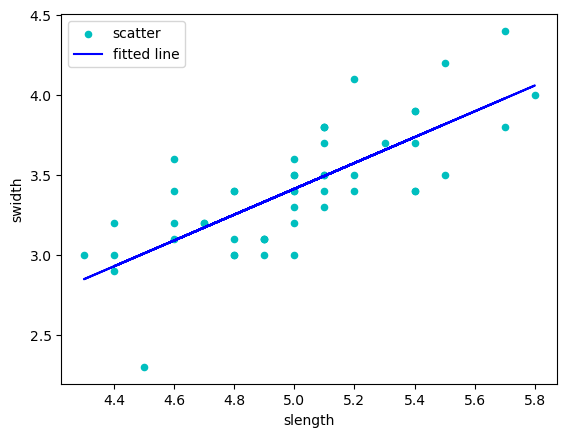

          slength    swidth   plength    pwidth
slength  1.000000  0.746780  0.263874  0.279092
swidth   0.746780  1.000000  0.176695  0.279973
plength  0.263874  0.176695  1.000000  0.306308
pwidth   0.279092  0.279973  0.306308  1.000000


C:\Users\tim94\AppData\Local\Temp\ipykernel_19424\3806308357.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df_setosa.corr()


In [107]:
intercept, slope = model.params
print(intercept,slope)
ax = df_setosa.plot(x='slength',y='swidth',kind="scatter",c='c')
plt.plot(X, intercept + slope*X, 'b', label='Fitted treated line')

#what does it do? ax.get_snap
# ax.get_snap
plt.legend(['scatter','fitted line'])
plt.show()
#correlation matrix
corrmatrix = df_setosa.corr()
# help(df.corr)
print (corrmatrix)
# help(ax.set_snap)
# ax.get_snap

C:\Users\tim94\AppData\Local\Temp\ipykernel_19424\3465241350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_virginica.corr()


const      0.610468
slength    0.750081
dtype: float64


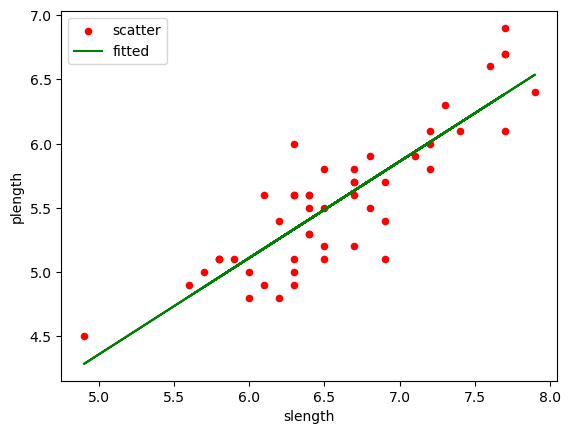

In [135]:
df_virginica=df[df['species']=='Iris-virginica']
df_virginica.corr()
X=df_virginica['slength']
y=df_virginica['plength']

# make sure that the model has an intercept (doesnt automatically fit one)
X2 = sm.add_constant(X)
# run OLS (Ordinary Least Squares)->fit least squares line: sm.OLS(dependent var,independent var)
est = sm.OLS(y, X2) 
model = est.fit()
print(model.params) # print model parameters

model.summary()
intercept, slope = model.params

#plot scatter
df_virginica.plot(kind='scatter', x='slength', y='plength', color='red')
# plot fitted line
plt.plot(x, intercept + x*slope, 'g')
plt.legend(['scatter','fitted'])
plt.show()

The fit looks okay but there is some variation in the sample. How about the other species?

We now have a model, a straight line, whose shape we have chosen, but whose parameters (slope and intersection) have been estimated/fitted from data with the least squares method - under the assumption the the errors are normally distributed. So we now use interpolation and extrapolation, i.e. get the swidth at any slength.




In [137]:
plength8=intercept + 8*slope
plength8

6.611114027295484

## Diagnostics
Credits to https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/ for implementing the diagnostic plots! This reference also helps with interpretation of those plots!

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use("seaborn-v0_8") # pretty matplotlib plots

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]
  tmp = pd.concat([model_fitted_y, model_residuals], axis=1, keys=['fitted', 'residuals'])


  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(data=tmp, x='fitted', y='residuals',
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  tmp2 = pd.DataFrame(model_norm_residuals_abs_sqrt, columns = ['model_norm_residuals_abs_sqrt'])
  tmp3 = pd.concat([model_fitted_y, tmp2], axis=1, keys=['fitted', 'residuals_normed'])
  sns.regplot(data=tmp3, x='fitted', y='residuals_normed',
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  tmp4 = pd.DataFrame(model_leverage, columns = ['model_leverage'])
  tmp5 = pd.DataFrame(model_norm_residuals, columns = ['model_norm_residuals'])
  tmp6 = pd.concat([tmp4, tmp5], axis=1, keys=['leverage', 'residuals_normed'])
  sns.regplot(data=tmp6, x='leverage', y='residuals_normed',
             scatter=False,
             ci=False,
             lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

C:\Users\tim94\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


KeyError: 41

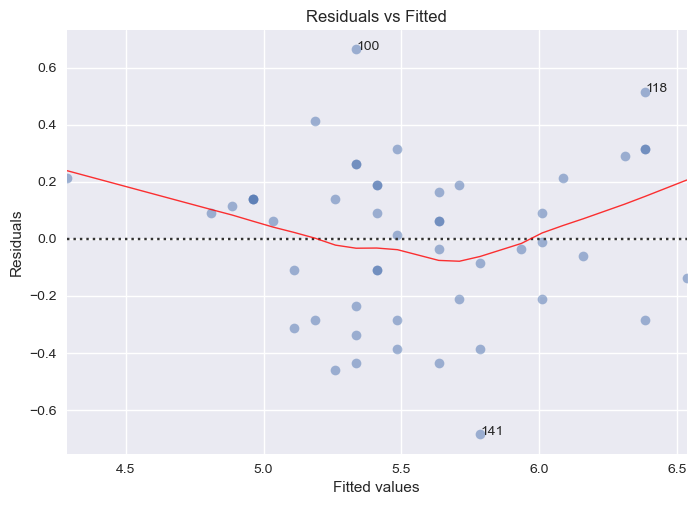

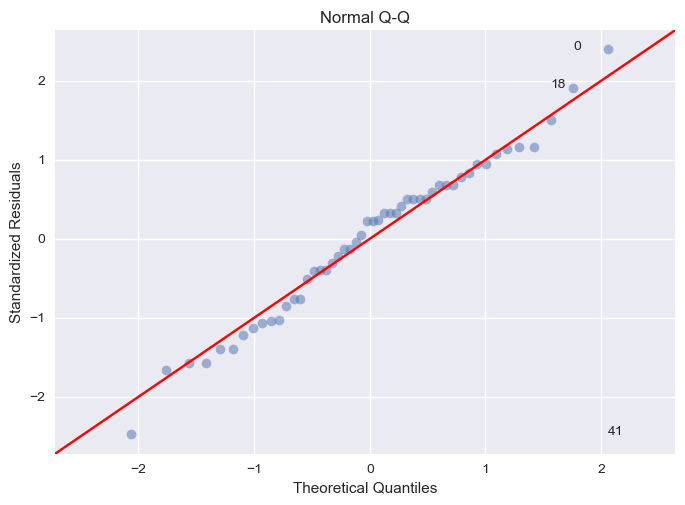

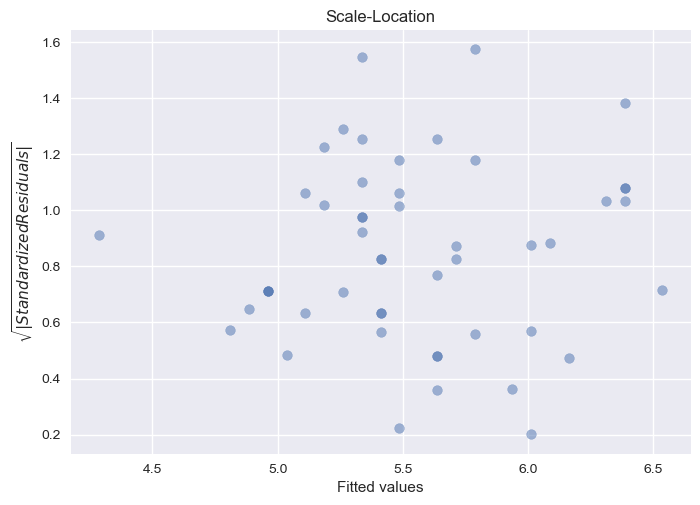

In [141]:
diagnostic_plots(X,y)

### Example Exponential p.d.f.

With scale $\beta$ and location $\mu$

$$f(x)=\frac{1}{\beta} e^{-(x-\mu)/\beta}     ,  x \ge \mu;\beta>0$$

 Location = 0.01 , Scale= 0.41


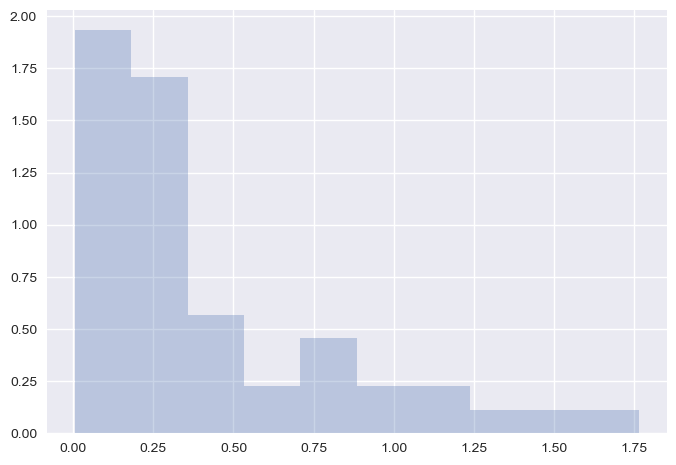

In [198]:
# Let us fit data to an exponential distribution
fig, ax = plt.subplots(1, 1)
# First generate a data set from a exponential distribution
x = stats.expon.rvs(0.0,0.5,size=50) #  scale = 0.5, location = 0.00, 100 variates
ax.hist(x, density=True, histtype='stepfilled', alpha=0.3)
# Fit scale and location to the histogram/data
loc, scale = stats.expon.fit(x) # ML estimator scale, lambda * exp(-lambda * x), scale =1/lambda
print(' Location = %1.2f , Scale= %1.2f' % (loc,scale))
plt.show()

If you run this code serval times, you'll observe that sometimes th fit is rather poor. Here, we know the true underlying distribution but in general we don't. Thus, it would be helpful to know the uncertainties on the fitted values. The curve_fit method below also returns the uncertainties.

## 3.2 Non-linear regression

If a line is not straight it is curved. There are many mathematical functions whose parameters we can try to fit to experimental data points. Some examples: Polynominals (first order is linear regression, second order is a parabola etc), exponential functions, normal function, sindoial wave function etc. You need to choose an approriate shape/function to obtain a good result.

With the Scipy.stat module we can look for preprogrammed functions (in principle you can program your own function whose parameters you want to fit too): https://docs.scipy.org/doc/scipy/reference/stats.html.

The scipy.optimize module provides a more general non-linear least squares fit. Look at and play with this example. It is complex and you will probably use some time to fully understand every step.

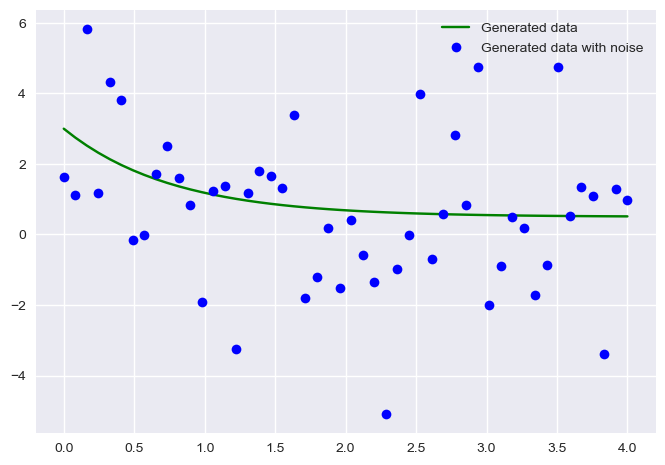

In [199]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
     return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
plt.plot(xdata, y, 'g-', label='Generated data')
np.random.seed(1729)
y_noise = np.random.normal(size=xdata.size)
ydata = y + 2*y_noise
plt.plot(xdata, ydata, 'bo', label='Generated data with noise')
plt.legend()
plt.show()


Let's fit the curve.

[2.99658625 1.57655938 0.1718015 ]
[1.33609615 1.39853112 0.47354042]


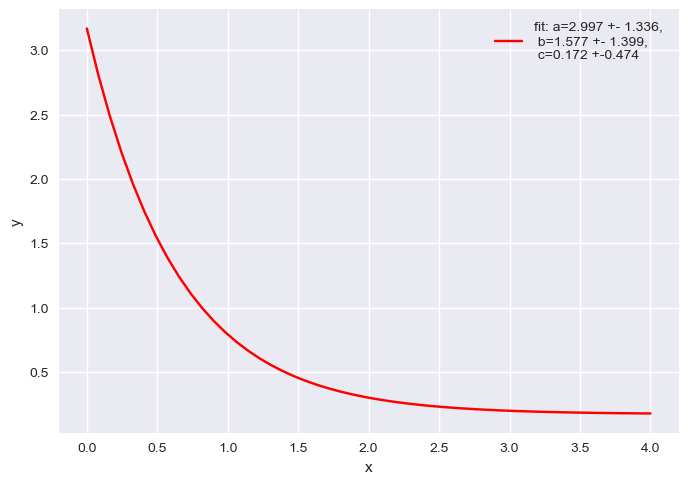

array([1.33609615, 1.39853112, 0.47354042])

In [201]:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
print(perr)
plt.plot(xdata, func(xdata, *popt), 'r-',label= \
         'fit: a=%5.3f +- %5.3f, \n b=%5.3f +- %5.3f, \n c=%5.3f +-%5.3f' % \
         (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# pcov is the covariance matrix. The errors**2 of each parameter are the values on the diagonal.
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
perr


Compare it to the data and the true function.

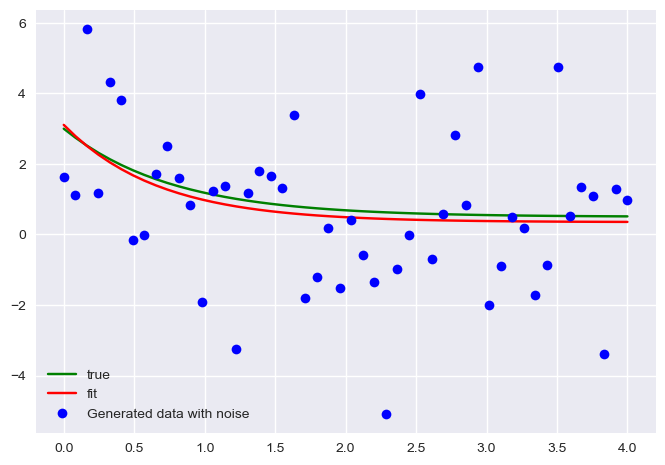

In [200]:
plt.plot(xdata, y, 'g-', label='true')
plt.plot(xdata, func(xdata, *popt), 'r-',label= 'fit')
plt.plot(xdata, ydata, 'bo', label='Generated data with noise')
plt.legend()
plt.show()

Try to add a bit more noise and rerun the code.

# 3.3 Non-parametric regression

So far we have used functions (models) with some predefined model. The parameters we fitted to data. If we have no clue about the model, but a rought idea on the shape non-parametric methods like isotonic regression. However, these require more data as also the exact shape needs to guessed or fitted from the data. So normally a non-parametric method gives poorer results.

There are several ways to do this in Python. You make look at this if you are interested:

https://pythonhosted.org/PyQt-Fit/NonParam_tut.html

# 3.4 Fitting with scikit-learn

When it comes to machine learning, the `scikit-learn` module is much richer than the stats module. You can find extensive documentation with examples in the [user guide](https://scikit-learn.org/stable/user_guide.html)

The module contains A LOT of different machine learning methods, and here we will cover only few of them. What is great about `scikit-learn` is that it has a uniform and consistent interface.

All the different ML approaches are implemented as classes with a set of same main methods:

1. `fitter = ...`: Create object.
2. `fitter.fit(x, y[, sample_weight])`: Fit model.
3. `y_pred = fitter.predict(X)`: Predict using the model.
4. `s = fitter.score(x, y[, sample_weight])`: Return an appropriate measure of model performance.

This allows us to easily replace one approach with another and find the best one for the problem at hand, by simply using another regression/classification object, while the rest of the code can remain the same.

*But you should be careful that there remains some justification! Otherwise you'll overfit. To be sure, you should use an approach like cross validation.*

In [202]:
# Let's write a method which can generate a linear dataset
# with n_d dimensions and some gaussian noise to it
import numpy as np
import matplotlib.pyplot as plt

def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
    #array of random numbers with dimension "size"
  x = np.random.uniform(0, 10, size=(n_points, n_d))
    #array of random numbers
  w = w or np.random.uniform(0.1, 10, n_d)
    #random constant
  b = b or np.random.uniform(-10, 10)
  y = np.dot(x, w) + b + np.random.normal(0, sigma, size=n_points)

  print('true w =', w, ';  b =', b)

  return x, y

get_linear()
# np.dot([1,2,3,4,9],[1,2,3,4,9])

true w = [6.62037466] ;  b = 5.358388323474408


(array([[9.43853622],
        [8.30047628],
        [2.56014078],
        [0.47645678],
        [3.45959082],
        [2.25689542],
        [5.69146928],
        [6.87270812],
        [3.12222137],
        [6.86040549]]),
 array([70.12251625, 59.90321666, 16.8281368 , 10.71629517, 36.47571811,
        22.53967864, 39.10446383, 49.99257603, 37.62607456, 49.13382015]))

true w = [3.07708742] ;  b = -4.9830161592668


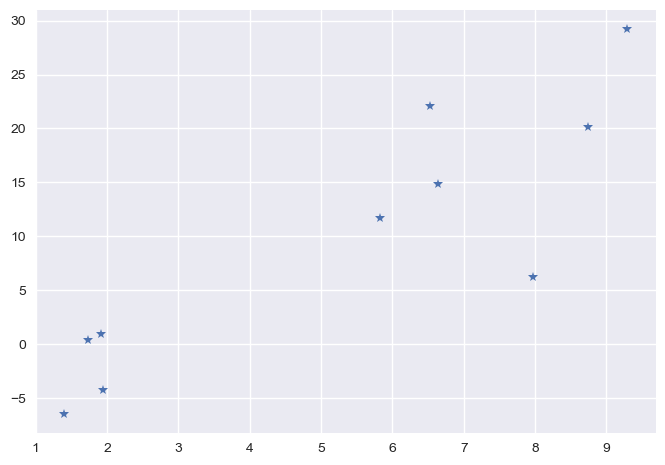

In [204]:
# Sample data from a straight line with noise to it
x, y = get_linear(n_d=1, n_points=10)
plt.plot(x[:, 0], y, '*')
plt.show()

In [203]:
from sklearn import datasets, linear_model
reg = linear_model.LinearRegression()
reg.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[0.3946091  0.10752433 0.30033186 1.43390539 0.11254019 0.13036605
 0.10261919 0.82239954 0.73617935 0.66277658 0.04380676 0.10034609
 0.13547535 0.04861926 0.78141918 0.25294472 0.23276247 0.40648742
 0.26976431 0.01788297 0.49267752 0.3484614  0.14352649 0.2573256
 0.92564588 0.24124827 1.76401331 0.04924327 0.27914363 1.1635104
 0.26745571 0.02630243 0.00579954 0.38414436 0.07380587 1.34528809
 0.50601684 0.21667933 0.68386312 1.00522185 0.05430972 1.12796993
 0.22948079 0.32870824 0.23929027 0.27861868 0.82686955 0.17330271
 0.3269612  0.06878246].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
w, w0 = reg.coef_, reg.intercept_
print(w, w0)

[6.17760321] 8.949962685639782


scikit-learn does not support calculation of covariance on fitted parameters. That is a pity maybe. However, we can use numpy vectorized methods.


In [58]:
np.std(y - reg.predict(x))

4.803242438678297

In [59]:
(np.cov(y - reg.predict(x)))**0.5

5.063062086735022

What about ```.score()```?



In [60]:
from sklearn.metrics import mean_squared_error, r2_score
# For regression the .score() yields the coefficient of determination.
print('Score: %.2f'
      % reg.score(x, y))
# Indeed, when calculating r2 "by hand" we end up with the same result.
print('Coefficient of determination: %.2f'
      % r2_score(y, reg.predict(x)))



Score: 0.93
Coefficient of determination: 0.93


What the default of ```.score()``` is can be found in each estimator’s documentation. If you like to choose your scoring function yourself, you can find the implemented versions under this link https://scikit-learn.org/stable/modules/model_evaluation.html.

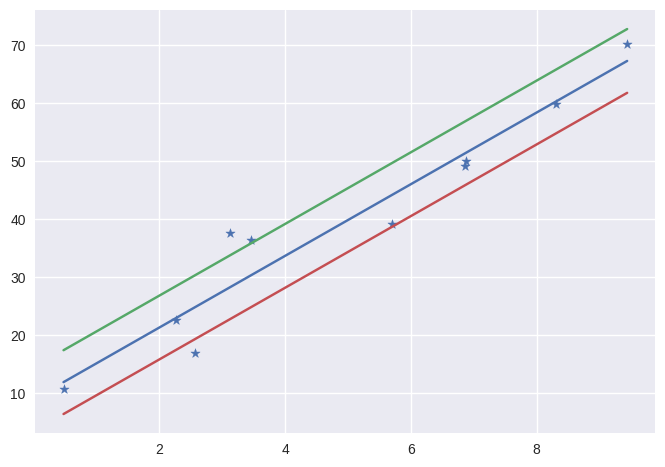

In [61]:
# Plot the fitted model with plus minus one standard deviation.
# Are the data points distributed as expected?
plt.scatter(x, y, marker='*')
x_f = np.linspace(x.min(), x.max(), 10)
y_f = w0 + w[0] * x_f
plt.plot(x_f, y_f)
plt.plot(x_f, y_f+5.5)
plt.plot(x_f, y_f-5.5)

true w = [1.77712535 8.16584955] ;  b = 4.638400487685367


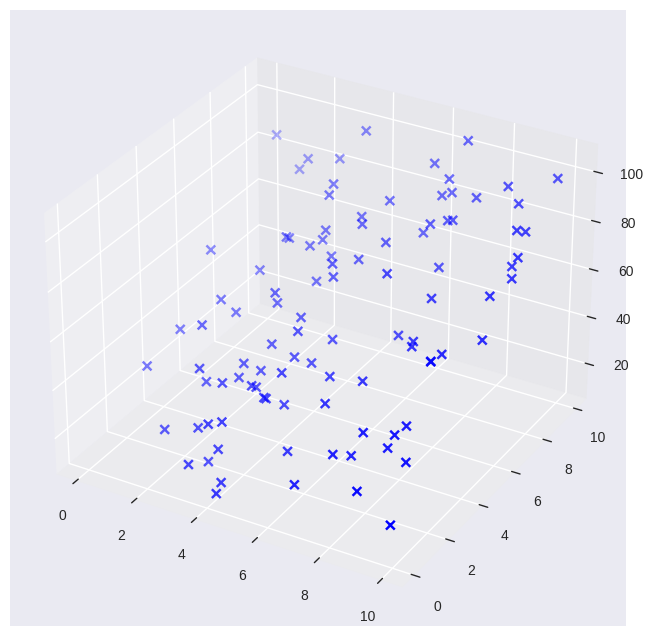

In [62]:
# Generate data points from a plane with some noise to it (default)
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker='x', color='b',s=40)

In [63]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

true w = [4.29092181 5.71695138] ;  b = -5.959560350076563


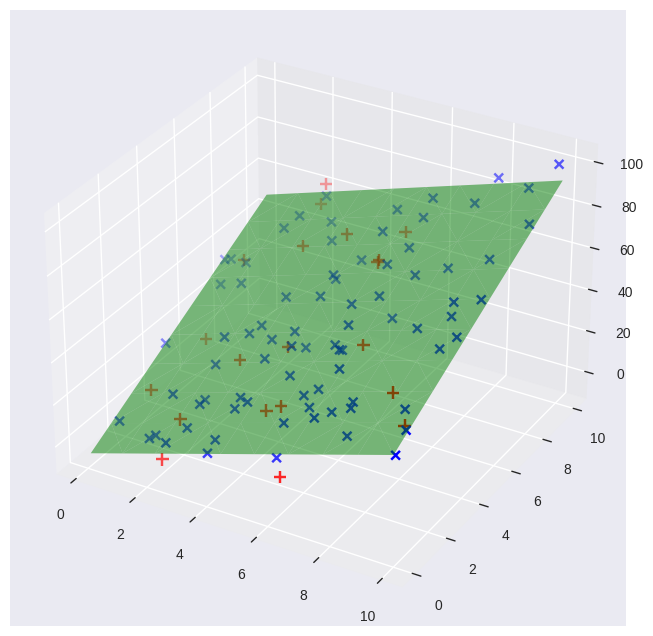

In [64]:
# When doing ML, it is recommended to split the dataset into a training
# and a test set. The training set is used to learn the parameters. The
# test set can be used to assess the performance of the trained model
# (overfitting and underfitting). sklearn provides a helpful method doing that.

from sklearn.model_selection import train_test_split

n_d = 2
x, y = get_linear(n_d=n_d, n_points=100, sigma=5)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', color='b',s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', color='r',s=80)

xx0 = np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1 = np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1 = [a.flatten() for a in np.meshgrid(xx0, xx1)]
xx = np.stack((xx0, xx1), axis=-1)
yy = reg.predict(xx)
ax.plot_trisurf(xx0, xx1, yy, alpha=0.5, color='g');

In [65]:
print('Score: %.2f'
      % reg.score(x, y))
print('Standard deviation of error: %.2f'
      % np.std(y-reg.predict(x)))

Score: 0.94
Standard deviation of error: 4.96


## End of notebook

We have now seen how to calculate confidence intervals and do linear regression with several python modules. The most popular ML models are implemented in sklearn. We don't have time practicing them in this Module. In Module 3 we will learn and practice deep neural networks.

Please post a question about today's content here:
https://forms.gle/ZY4pbMiEu1iYFYbp7

Many thanks and see you tomorrow !


## Extra - Much used ML performance measures

1. Regression:
* Mean Square Error (MSE): $mse=\frac{1}{n}\sum_i(y_i - \hat y(\bar x_i))^2$
* Mean Absolute Error (MAE): $mae=\frac{1}{n}\sum_i|y_i - \hat y(\bar x_i)|$
* Median Absolute Deviation (MAD): $mad=median(|y_i - \hat y(\bar x_i)|)$
* Fraction of the explained variance: $R^2=1-\frac{\sum_i(y_i - \hat y(\bar x_i))^2}{\sum_i(y_i - \bar y_i)^2}$, where $\bar y=\frac{1}{n}\sum_i y_i$

2. Classification:
* Confusion matrix


<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/confusion_mtr.png" width="60%"/>

* Accuracy $=\frac{TP+TN}{TP+FP+FN+TN}$
* Precision $=\frac{TP}{TP+FP}$
* Recall $=\frac{TP}{TP+FN}$
* F1 $=2\frac{Precision \cdot Recall}{Precision+Recall} = \frac{2 TP}{2 TP + FP+FN}$
* Threat score (TS), or Intersection over Union (IoU): IoU=$\frac{TP}{TP+FN+FP}$

During model optimization the used measure in most cases must be differentiable. To this end usually some measure of similarities of distributions are employed (e.g. cross-entropy).

## Extra - Multiple Linear Regression

In [66]:
url = "https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv"
ds = pd.read_csv(url)
ds.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
# independend variables
X = ds.iloc[:, 0:4]
# dependent variable (Profit)
y = ds.iloc[:, 4]
X.head()



,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [68]:
#Convert the 'States' into categorical columns
states=pd.get_dummies(X['State'],drop_first=True)

# Drop the state coulmn
X=X.drop('State',axis=1)

# Add the dummy-states independent variables
X=pd.concat([X,states],axis=1)
pd.set_option('display.max_rows', 200)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


California is the *reference class*.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#add constant to predictor variables
X_train = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           3.91e-21
Time:                        10:23:19   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.255e+04   8358.538     

Evaluate other scores:

In [70]:
#evaluate MSE, MAD, and R2 on train and test datasets
#prediction in sample:
y_p_train = model.predict(X_train)

# Predicting the Test set results
X_test = sm.add_constant(X_test)
y_p_test = model.predict(X_test)

# mse
print('train mse =', np.std(y_train - y_p_train))
print('test mse =', np.std(y_test - y_p_test))
# mse
print('train mae =', np.mean(np.abs(y_train - y_p_train)))
print('test mae =', np.mean(np.abs(y_test - y_p_test)))

train mse = 9031.666612578969
test mse = 8239.203787443497
train mae = 6341.535758318905
test mae = 7514.293659513181


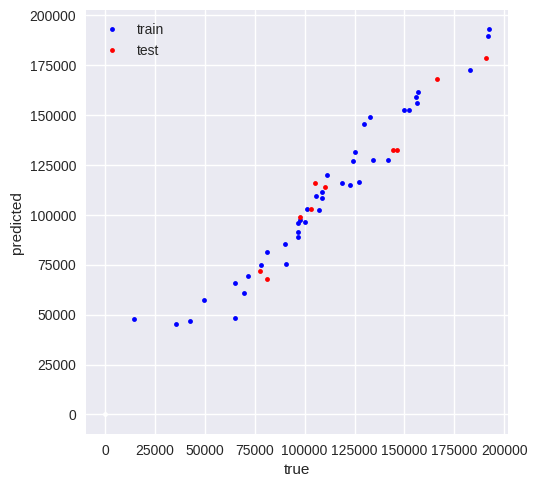

In [71]:
# plot y vs predicted y for test and train parts
plt.plot(y_train, y_p_train, 'b.', label='train')
plt.plot(y_test, y_p_test, 'r.', label='test')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()